
# <p style="text-align: center;"> MODELADO DE OBJETOS AUTOGRAVITANTES</p>

### <p style="text-align: center;">Camilo Parra, William Romero</p>

#### <p style="text-align: center;">Junio de 2023</p>

In [30]:
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

## Pregunta de Investigación

La intención de este trabajo es entender , o al menos intuir **¿Cual es la incidencia de los fluidos no pascalianos en la estructura estelar newtoniana y relativistas?**. Esto es, supondremos un perfil de densidad y una forma particular de la distribución de presiones radiales y tangenciales. A partir de esas suposiciones compararemos los perfiles de presión para un espacio de parámetros.

## ¿Qué y cómo hacerlo?

Como lo planteamos inicialmente la intención es entender, o al menos intruir, **el efecto que induce la anisotropía de las presiones en los modelos estelares, tanto newtonianos como relativistas**. Para responder esa pregunta se propone construir dos modelos: **Newtonianos y relativistas** para distintos valores de los parámetros involucrados. 

Para el modelo newtoniano se deben integrar las ecuaciones:

$$ \frac{\delta P(r)}{dr} = - \frac{G m(r) \rho(r) } { r^{2} } + 2 \frac{P_{\perp} - P(r)}{r} \\[1cm]\frac{\delta m(r) }{\delta r} = 4\pi^{2}\rho(r)  $$ 

Mientras que para el modelo relativista se deben integrar las siguientes ecuaciones:;

$$ \frac{\delta P(r)}{dr} = - \frac{G m(r) \rho(r) }{r^{2}} \left(1 + \frac{P(r)}{\rho(r)c^{2}}\right) \left(1 + \frac{4\pi^{3}}{}\right) \left(1 + \frac{P(r)}{\rho(r)c^{2}}\right) \left(1 - 2 \frac{G m(r) }{ rc^{2} }\right)^{-1} + 2 \frac{P_{\perp}(r) - P(r)}{r} \\[1cm] \frac{\delta m(r)}{dr} = 4\pi r^{2} \rho(r)$$

utilizando el perfil de de densidad

$$ \bar{p} = (1-B\bar{r}^{2}) $$

De esta manera, para el **modelo newtoniano**, usando  la estrategia 1,tenemos las condiciones iniciales:

$$ \rho(r) = \bar{\rho} \rho_{0}, \quad m(r) = \bar{m} M \quad P(r) = \bar{P} P_{0} \quad r = \bar{r} R$$

Los parámetros auxiliares adimensionales son los siguientes:

$$ \mu = \frac{M \times G}{R \times c^2}, \quad k = \frac{P_0}{\rho_{0}c^2}, \quad \eta = \frac{\rho_{0}}{\bar{\rho}} \quad \bar{\rho} = \frac{M}{\frac{4\pi}{3}R^3} $$

Así, el despeje queda de la siguiente manera:

$$ \frac{\delta P(r)}{\delta r}  = \frac{h \times m(r) \times \rho(r)}{r^2} \\[0.5cm]$$

$$ \frac{\delta \bar{P}}{\delta \bar{r}} \frac{\delta \rho_{0}}{R} = h \frac{\bar{m}M\bar{\rho}\rho_{0}}{\bar{r}^{2}R^2} \frac{c^2}{c^2} \frac{G}{G} \\[0.5cm]$$

$$ \frac{\delta \bar{P}}{\delta \bar{r}} = h \frac{\rho_{0} c^2 }{ P_{0} } \frac{MG}{R c^2} \frac{\bar{m}}{\bar{r}^2} \\[0.5cm]$$

$$ \frac{\delta \bar{P}}{\delta \bar{r}} = \frac{h \times \mu \times \bar{m}}{G \times k \times r^{2}} - \left(\frac{5}{3} - \frac{5}{h} \right) \frac{h \times \mu \times \bar{m}}{G \times k \times \bar{r}^{2}} \bar{r}^{2} \\[0.5cm]$$


$$ \frac{\delta \bar{P}}{\delta \bar{r}} = \frac{h \times \mu \times \bar{m}}{G \times k \times r^2} ( 1 - \beta \bar{r}^{2})\\[0.5cm]$$

$$ \frac{\delta \bar{m}}{\delta \bar{r}} = \eta \bar{r}^2 ( 1 - \beta \bar{r}^{2}) $$

Así al resolver la integral obtenemos los siguientes resultados:

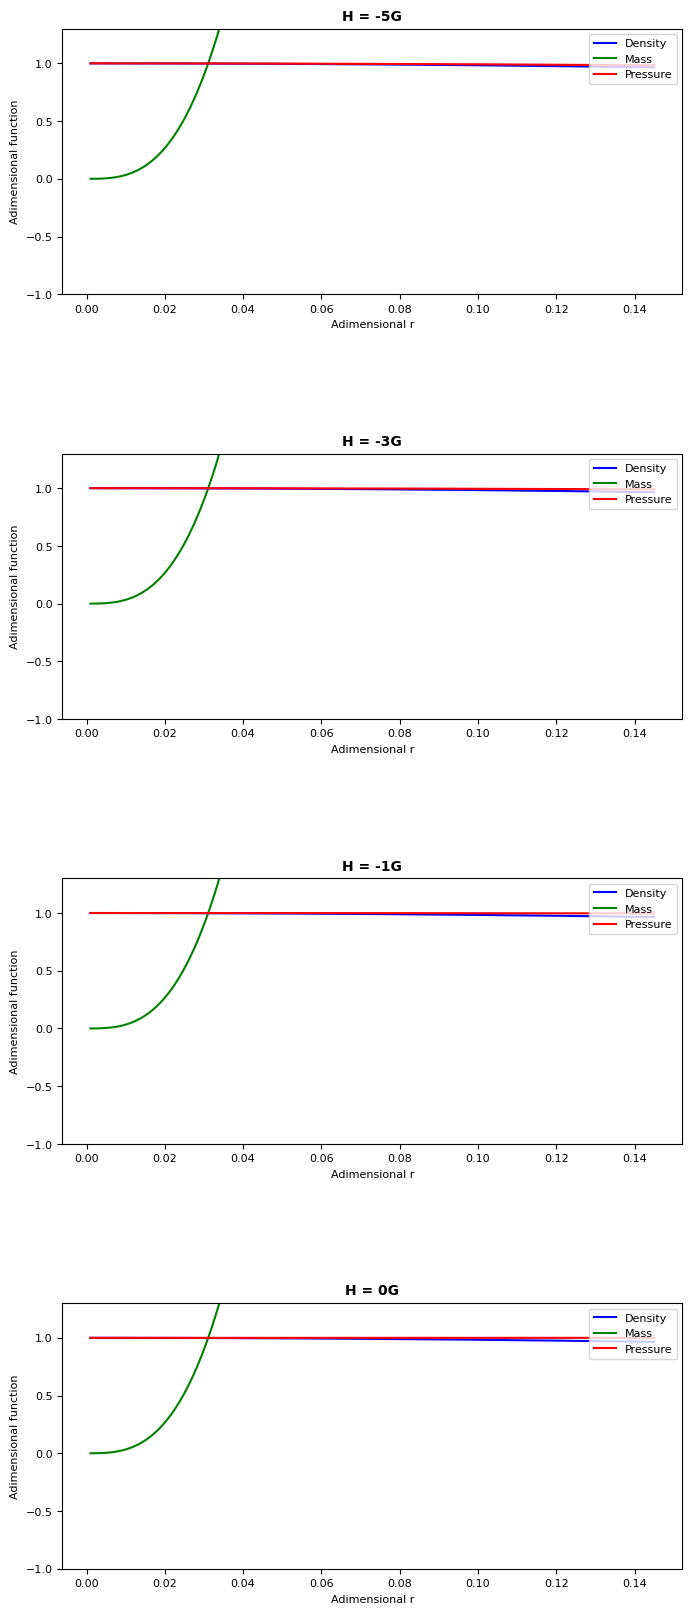

In [73]:
# constants
u = 0.001
k = 100
n = 100000
B = 5/3 * (1 - 3/n) 
G = 6.67430e-11 # meters cubed per kilogram second squared

def odes(r, x):
    # assign each ODE to a vector element
    P = x[0]
    m = x[1]

    # define each ODE
    dPdr = (1 - B * pow(r, 2)) * (h * u * m) / (G * k * pow(r, 2))
    dmdr = (1 - B * pow(r, 2)) * n * pow(r, 2)

    return [dPdr, dmdr]

# initial conditions
x0 = [1, 0]

# declare a time vector (time window)
r = np.linspace(0.001,0.145,10000)

# It only makes sense to represent h as multiples of G because it holds the same degree of magnitud according to G units
h_values = [-5*G, -3*G, -1*G, 0*G]
g_values = [-5, -3, -1, 0]
pressure_values = []
mass_values = []
density_values = []

for h in h_values:
    x = solve_ivp(odes, t_eval = r , y0 = x0, t_span=[0.001, 0.145])
    density_values.append(1 - B * pow(r, 2))
    pressure_values.append(x.y[0])
    mass_values.append(x.y[1])

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 20), gridspec_kw={'hspace': 0.6})

for i, g_value in enumerate(g_values):
    axs[i].plot(r, density_values[i], label='Density', color='blue')
    axs[i].plot(r, mass_values[i], label='Mass', color='green')
    axs[i].plot(r, pressure_values[i], label='Pressure', color='red')
    axs[i].set_title(f'H = {g_value}G', fontsize=10, fontweight='bold')
    axs[i].set_xlabel('Adimensional r', fontsize=8)
    axs[i].set_ylabel('Adimensional function', fontsize=8)
    axs[i].set_ylim(-1, 1.3)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

    # Add a legend to the plot
    axs[i].legend(loc='upper right', fontsize=8)


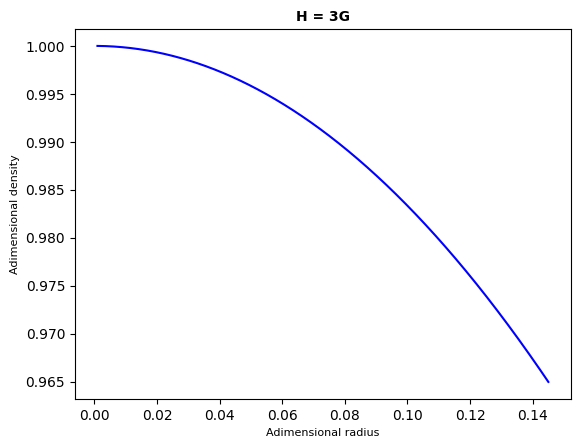

In [78]:
plt.plot(r, density_values[1], color='blue')
plt.title(f'H = 3G, Newtonian Model', fontsize=10, fontweight='bold')
plt.xlabel('Adimensional radius', fontsize=8)
plt.ylabel('Adimensional density', fontsize=8)
plt.show()

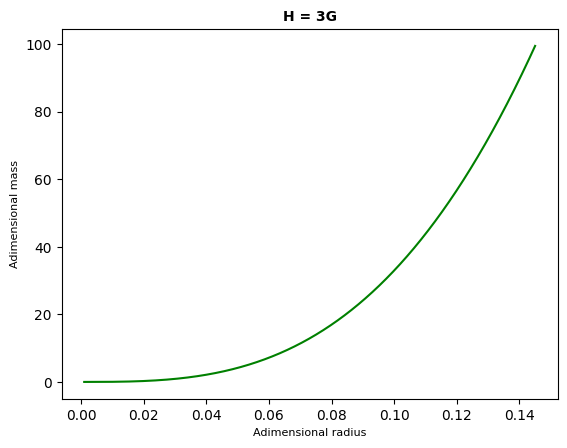

In [79]:
plt.plot(r, mass_values[1], color='green')
plt.title(f'H = 3G, Newtonian Model', fontsize=10, fontweight='bold')
plt.xlabel('Adimensional radius', fontsize=8)
plt.ylabel('Adimensional mass', fontsize=8)
plt.show()

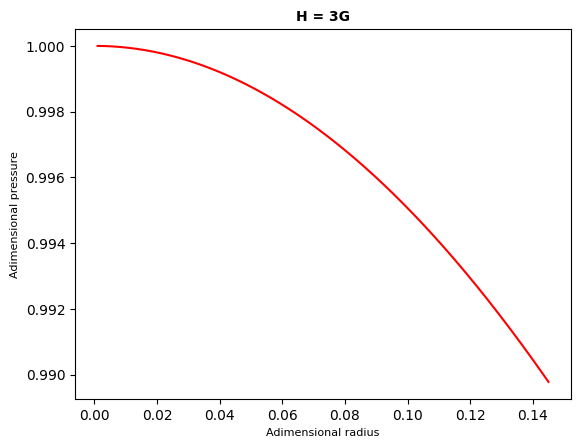

In [80]:
plt.plot(r, pressure_values[1], color='red')
plt.title(f'H = 3G, Newtonian Model', fontsize=10, fontweight='bold')
plt.xlabel('Adimensional radius', fontsize=8)
plt.ylabel('Adimensional pressure', fontsize=8)
plt.show()

## *Analisis*

Cuando hacemos todas las variables adimensionales en las ecuaciones diferenciales newtonianas auto-gravitantes, podemos obtener una comprensión del comportamiento del sistema sin verse influenciados por valores específicos de los parámetros físicos. En este caso, tiene sentido tomar valores de h multiplos de -G, lo que significa que estamos escalando en relacion a la constante gravitacional y independientemente de las unidades que tomemos para ella.

Con esta escala, encontramos que la masa del sistema aumenta exponencialmente a medida que nos acercamos al centro del sistema. Esto se debe a que la fuerza gravitatoria se vuelve más fuerte a medida que nos acercamos al centro, lo que lleva a una acumulación de masa en ese punto. El aumento exponencial de la masa puede tener consecuencias importantes para el destino eventual del sistema, como la formación de un agujero negro.

Al mismo tiempo, encontramos que la densidad y la presión del sistema disminuyen de manera exponencial con un coeficiente mucho menor a medida que nos acercamos al centro. Esto indica que el sistema se vuelve menos denso y menos presurizado a medida que nos acercamos al centro, pero a un ritmo más lento que antes. Este comportamiento es esperado, ya que la fuerza gravitatoria hace que la materia se comprima hacia el centro, lo que lleva a una disminución en la densidad y la presión.

Es importante destacar que, en el modelo adimensional descrito anteriormente, la tasa a la que aumenta la masa adimensional del sistema es mucho mayor que la tasa a la que disminuyen la presión y la densidad. . Esta relación entre las tasas de cambio está directamente relacionada con los coeficientes adimensionales elegidos.

En resumen, la elección de los coeficientes adimensionales utilizados en el modelo puede tener un impacto significativo en el comportamiento del sistema.

En general, el análisis adimensional de las ecuaciones diferenciales newtonianas auto-gravitantes con una constante gravitacional escalada proporciona información sobre el comportamiento del sistema sin verse influenciados por valores específicos de los parámetros físicos. El aumento exponencial de la masa hacia el centro y la disminución exponencial de la densidad y la presión son factores importantes a considerar al modelar la evolución de los sistemas astrofísicos.

Por su parte, el modelo relativista se desarrolla de la siiguiente manera:


al hacer el despeje obtenemos que

$$ \frac{\delta \bar{P}}{\delta \bar{r}}  = \frac{h \times \mu \times \bar{m}}{G \times K \times r^{2}}
(1 - \beta \bar{r}^{2}) \left( 1 + \frac{k \bar{P}}{(1 - \beta \bar{r}^{2})}  \right)
\left( 1 + \frac{3 \eta k \bar{P} r^3}{\bar{m}}  \right) \left( 1 - \frac{2 \mu k \bar{m}}{\bar{r}}  \right)^{-1} \\[1cm] $$ 

$$ \frac{\delta \bar{m} }{\delta \bar{r}} = R \bar{r}^2 ( 1 - \beta \bar{r}^{2})$$

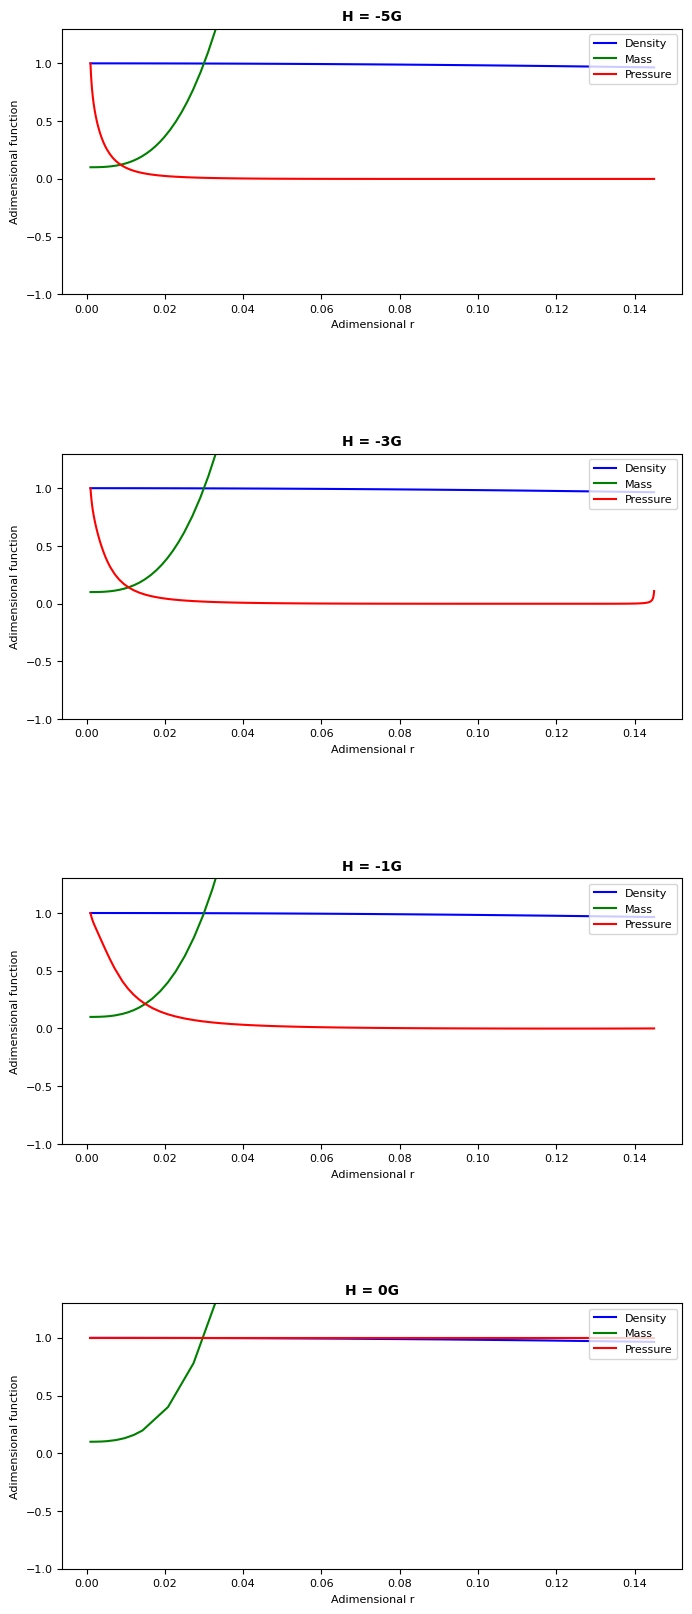

In [82]:
# constants
u = 0.001
k = 100
n = 100000
B = 5/3 * (1 - 3/n) 
G = 6.67430e-11 # meters cubed per kilogram second squared

def odes(r, x):
    # assign each ODE to a vector element
    P = x[0]
    m = x[1]

    # define each ODE
    dPdr = (1 - B * pow(r, 2)) * ((h * u * m) / (G * k * pow(r, 2))) * (1 + (k * P)/(1 - B * pow(r, 2))) * ((1 + (3 * n * k * P * pow(r, 3)) / m) / (1 - (2 * u * m )/ r))
    dmdr = (1 - B * pow(r, 2)) * n * pow(r, 2)

    return [dPdr, dmdr]

# initial conditions
x0 = [1, 0.1]

# declare a time vector (time window)
r = np.linspace(0.001, 0.145, 1000)

# It only makes sense to represent h as multiples of G because it holds the same degree of magnitud according to G units
h_values = [-5*G, -3*G, -1*G, 0*G]
g_values = [-5, -3, -1, 0]
pressure_values = []
mass_values = []
density_values = []
r_values = []


for h in h_values:
    x = solve_ivp(odes, y0 = x0, t_span=[0.001, 0.145], method='BDF')
    r_values.append(x.t)
    density_values.append(1 - B * pow(x.t, 2))
    pressure_values.append(x.y[0])
    mass_values.append(x.y[1])

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 20), gridspec_kw={'hspace': 0.6})

for i, g_value in enumerate(g_values):
    axs[i].plot(r_values[i], density_values[i], label='Density', color='blue')
    axs[i].plot(r_values[i], mass_values[i], label='Mass', color='green')
    axs[i].plot(r_values[i], pressure_values[i], label='Pressure', color='red')
    axs[i].set_title(f'H = {g_value}G', fontsize=10, fontweight='bold')
    axs[i].set_xlabel('Adimensional r', fontsize=8)
    axs[i].set_ylabel('Adimensional function', fontsize=8)
    axs[i].set_ylim(-1, 1.3)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

    # Add a legend to the plot
    axs[i].legend(loc='upper right', fontsize=8)

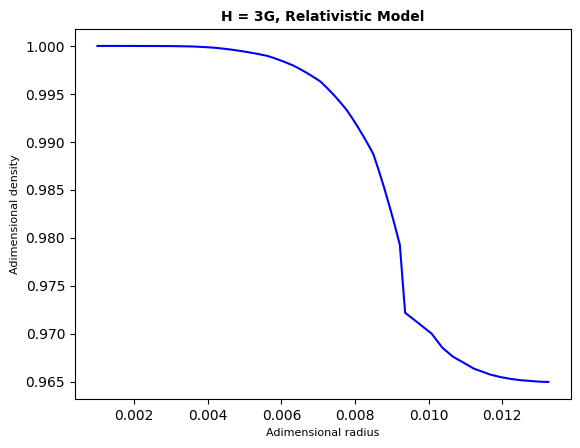

In [84]:
plt.plot(r[:len(density_values[1])], density_values[1], color='blue')
plt.title(f'H = 3G, Relativistic Model', fontsize=10, fontweight='bold')
plt.xlabel('Adimensional radius', fontsize=8)
plt.ylabel('Adimensional density', fontsize=8)
plt.show()

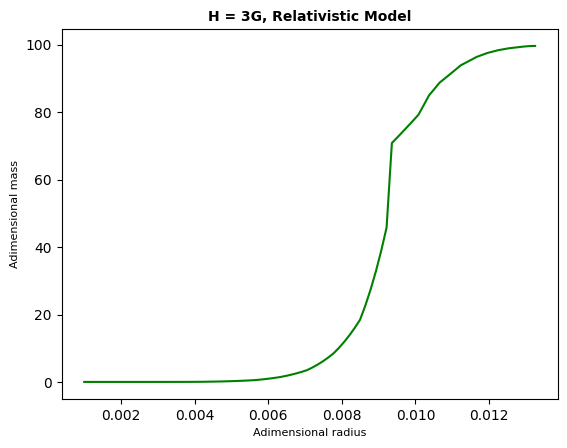

In [86]:
plt.plot(r[:len(mass_values[1])], mass_values[1], color='green')
plt.title(f'H = 3G, Relativistic Model', fontsize=10, fontweight='bold')
plt.xlabel('Adimensional radius', fontsize=8)
plt.ylabel('Adimensional mass', fontsize=8)
plt.show()

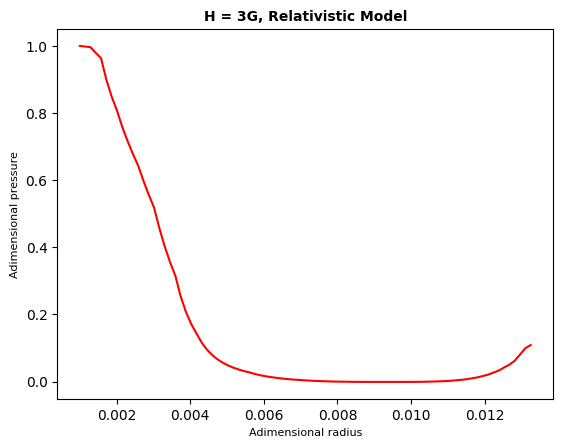

In [87]:
plt.plot(r[:len(pressure_values[1])], pressure_values[1], color='red')
plt.title(f'H = 3G, Relativistic Model', fontsize=10, fontweight='bold')
plt.xlabel('Adimensional radius', fontsize=8)
plt.ylabel('Adimensional pressure', fontsize=8)
plt.show()

## *Analisis*

En el modelo relativista, la relación entre la tasa de cambio de la masa y la tasa de cambio de la presión y la densidad es diferente a la del modelo newtoniano. En este caso, la tasa a la que aumenta la masa adimensional del sistema es similar a la tasa a la que disminuye la presión, lo que significa que la densidad del sistema permanece relativamente constante.

Sin embargo, es importante destacar que esta solución es mucho más dependiente de los parámetros adimensionales elegidos en el modelo. Si se eligen coeficientes adimensionales inapropiados, la solución puede ser inestable para su resolucion.

Por lo tanto, es crucial seleccionar cuidadosamente los coeficientes adimensionales para garantizar que la solución sea físicamente realista y estable. Además, en un modelo relativista, también es importante considerar los efectos adicionales de la dilatación del tiempo y la contracción de longitud, que pueden tener un impacto significativo en el comportamiento del sistema.